## Download dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ayushsharma2k/dogcat-classificationcnn

 97% 211M/217M [00:05<00:00, 33.9MB/s]
100% 217M/217M [00:05<00:00, 38.8MB/s]


In [ ]:
!unzip '/content/dogcat-classificationcnn.zip'

## Start

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tqdm import tqdm

### Data preprocessing

In [ ]:
train_x = []
train_y = []
test_x = []
test_y = []

In [ ]:
def data_preprocessing(img_path, img_class, list_x, list_y):
    img = image.load_img(img_path, target_size= (200, 200))
    img = image.img_to_array(img)
    img = img/255.0

    list_x.append(img)
    list_y.append(img_class)

In [ ]:
train_path = '/content/dataset/training_set/'
# print(train_path)

for folder in tqdm(os.listdir(train_path)):
    for img in os.listdir(train_path+folder):
        img_path = train_path+folder+'/'+img
        img_class = folder
        
        data_preprocessing(img_path, img_class, train_x, train_y)

100%|██████████| 2/2 [00:22<00:00, 11.29s/it]


In [ ]:
train_x = np.array(train_x)
train_y = np.array(train_y)

train_x.shape, train_y.shape

((8000, 200, 200, 3), (8000,))

In [ ]:
train_y[:5]

array(['dogs', 'dogs', 'dogs', 'dogs', 'dogs'], dtype='<U4')

In [ ]:
train_y[-5:]

array(['cats', 'cats', 'cats', 'cats', 'cats'], dtype='<U4')

In [ ]:
train_path = '/content/dataset/test_set/'
# print(train_path)

for folder in tqdm(os.listdir(train_path)):
    for img in os.listdir(train_path+folder):
        img_path = train_path+folder+'/'+img
        img_class = folder
        
        data_preprocessing(img_path, img_class, test_x, test_y)

100%|██████████| 2/2 [00:17<00:00,  8.83s/it]


In [ ]:
test_x = np.array(test_x)
test_y = np.array(test_y)

test_x.shape, test_y.shape

((2000, 200, 200, 3), (2000,))

In [ ]:
# label encode_y
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()

train_y = le_y.fit_transform(train_y)

In [ ]:
test_y = le_y.transform(test_y)

In [ ]:
# shuffling data
from sklearn.utils import shuffle

train_x, train_y = shuffle(train_x, train_y)
train_x.shape, train_y.shape

((8000, 200, 200, 3), (8000,))

In [ ]:
train_y[:10]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
test_x, test_y = shuffle(test_x, test_y)
test_x.shape, test_y.shape

((2000, 200, 200, 3), (2000,))

## CONV NN

In [ ]:
# libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
# intialise
clf = Sequential()

In [ ]:
input_shape = (200, 200, 3)

# hidden layers
clf.add(Conv2D(64, (3,3), activation= 'relu', input_shape = input_shape))
clf.add(Conv2D(32, (3,3), activation= 'relu'))
clf.add(MaxPool2D(pool_size= (2,2)))
clf.add(Dropout(rate= 0.3))

clf.add(Conv2D(32, (3,3), activation= 'relu'))
clf.add(Conv2D(16, (3,3), activation= 'relu'))
clf.add(MaxPool2D(pool_size= (2,2)))
clf.add(Dropout(rate= 0.3))

# flatten layer
clf.add(Flatten())

# Fully connected layer (FC)
clf.add(Dense(128, activation= 'relu'))

# output layer
clf.add(Dense(1, activation= 'sigmoid'))

In [ ]:
clf.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 196, 196, 32)      18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 94, 94, 16)        4624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 47, 47, 16)       

In [ ]:
# compilling model
clf.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
clf.fit(train_x, train_y, batch_size= 300, epochs= 20, validation_data= (test_x, test_y))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 18s 2ms/step - loss: 0.8413 - accuracy: 0.5164 - val_loss: 0.6906 - val_accuracy: 0.5495
Epoch 2/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.6837 - accuracy: 0.5577 - val_loss: 0.6775 - val_accuracy: 0.5810
Epoch 3/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.6695 - accuracy: 0.5894 - val_loss: 0.6679 - val_accuracy: 0.6020
Epoch 4/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.6649 - accuracy: 0.6028 - val_loss: 0.6697 - val_accuracy: 0.6010
Epoch 5/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.6465 - accuracy: 0.6219 - val_loss: 0.6540 - val_accuracy: 0.6090
Epoch 6/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.6237 - accuracy: 0.6469 - val_loss: 0.6262 - val_accuracy: 0.6550
Epoch 7/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.608

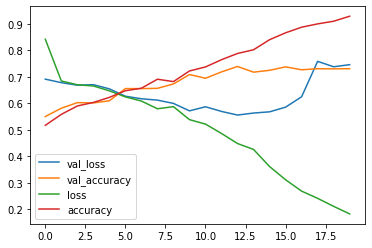

In [ ]:
import pandas as pd

pd.DataFrame(clf.history.history).plot()
plt.show()